### TODO
##### try without input of charge
##### setup keras cross validation


In [1]:
#!conda install --name tf-gpu -c matplotlib pandas -y
#!conda install --name tf-gpu -c conda-forge hyperopt -y
#!conda install --name tf-gpu -c jaikumarm hyperas -y
#!conda activate

In [1]:

from time import time



from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.dummy import *

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


import pandas as pd
import numpy as np
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split


from time import time
from keras.layers.core import Dense, Activation, Dropout
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import RNN, BatchNormalization
from keras.datasets import imdb
import keras.layers.advanced_activations
from tensorflow.keras.callbacks import TensorBoard

from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.dummy import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM, Embedding
from keras.datasets import mnist
from keras.utils import np_utils
import pandas as pd
import numpy as np
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [1]:
!conda env export > environment.yml

In [2]:
os.getcwd()
#os.chdir('/home/jgmeyer2/MHCpeptides/')

'C:\\Users\\qdickinson\\Jupyter Notebooks\\20201230_train_new_model_MHC_all5'

In [3]:
inp = pd.read_csv("A1101_binding.txt", header=0, low_memory=False, sep="\t")
inp.index = range(len(inp))
inp.head()

inp = inp.groupby('Sequence', as_index=False).mean()
inp

,Sequence,Intensity
0,AAAATSAGTR,0.253411
1,AAASSLLYK,0.748583
2,AAATSAGTR,0.231444
3,AAATSAGTRR,0.341356
4,AAAYFVGYLK,1.000000
...,...,...
6278,YYKDDISYF,0.084687
6279,YYLEKANKI,0.084687
6280,YYPEDPVKL,0.084687
6281,YYQLCQHLK,0.469617


### group strings that have the same first 8 characters

In [4]:
peptides = inp['Sequence'].tolist()
#peptides

In [5]:
peptides_sorted = inp['Sequence'].tolist()
peptides_sorted.sort()
peptides_sorted


['AAAATSAGTR',
 'AAASSLLYK',
 'AAATSAGTR',
 'AAATSAGTRR',
 'AAAYFVGYLK',
 'AACAMLLVK',
 'AADEPPLVR',
 'AADFPGIAR',
 'AADKAAAAY',
 'AAERGPGQML',
 'AAFLDDNAF',
 'AAFQSSMTK',
 'AAGIAWIPY',
 'AAGIIILMEY',
 'AAGLPAIFV',
 'AAHARFVAA',
 'AAIDGEYRLK',
 'AAIDLSHFL',
 'AAIDRQVSVK',
 'AAISDYDYY',
 'AAISKLGINY',
 'AAKKKGASL',
 'AAKYVEHDPR',
 'AALDGTFQR',
 'AALDGTFQRK',
 'AALDLSHFL',
 'AALEGLSGF',
 'AALFMYYAK',
 'AALFMYYAKR',
 'AALSSLAKH',
 'AAMQRKLEK',
 'AAMVLLLRK',
 'AANEIRISK',
 'AANEMGLIEK',
 'AANTVIWDY',
 'AARILSEKR',
 'AARILSEKRK',
 'AASCGGAVF',
 'AATIQTPTK',
 'AAVDLSHFL',
 'AAVTLNRIK',
 'AAYFVGYLK',
 'AAYYFMKFR',
 'AAYYFMKFRR',
 'ACMDGFEVV',
 'ACNKIKGKK',
 'ACQEAVKLK',
 'ACRCGRFQK',
 'ACREQQLPV',
 'ACYNTCYCK',
 'ADFKLFFRW',
 'ADLRFASEF',
 'AEALLADGL',
 'AEDMLNPNY',
 'AEFKYIAAV',
 'AEFPVGSTA',
 'AEFWDVFLS',
 'AEGTGITHL',
 'AEHDPWWAV',
 'AEHFENQVL',
 'AEIDRSFKP',
 'AEILSGRVI',
 'AEKSRGRRI',
 'AEMGGHAER',
 'AEMKTDAA',
 'AEMKTDAAT',
 'AEMKTDAATL',
 'AEMRAYHGF',
 'AEMRETHWL',
 'AENGWGFYF',
 'AENK

In [6]:
### get the first 8 amino acids for the 'core sequence'
first8 = [x[:8] for x in peptides]
#first8

In [7]:
print(len(first8))
print(len(set(first8)))

6283
6010


In [8]:
print(len(first8))
print(len(set(first8)))

6283
6010


In [9]:
unique_cores = set(first8)

In [10]:
### make a dict with the indexes of the positions for each of the unique core sequences
core_seqs_dict = {}
n=0
for x in list(unique_cores):
    #print(n)
    core_seqs_dict[n] = [i for i, y in enumerate(first8) if y == x ]
    n+=1

In [11]:
core_seqs_dict[202]

[3430]

In [12]:
len(inp['Sequence'])

6283

In [13]:
# are there duplicate peptides?
len(set(inp['Sequence']))

6283

In [14]:
inp['namelen']= [len(str(i)) for i in inp['Sequence']]
input1 = inp[ (inp['namelen'] >= 2) ]
#parameters, max length of sequence with
maxlen = max([len(x) for x in input1.Sequence]) ### list comprehension to get max length of sequences

## encoding sequence by index for embedding layer

In [15]:
### make vocabulary for encoding
seq = input1['Sequence']
vocab = set(''.join([str(i) for i in seq]))
vocab.add('END')  # not using END cause they are all the same length
len_vocab = len(vocab)
print(vocab)

{'END', 'G', 'V', 'L', 'K', 'N', 'P', 'H', 'E', 'Y', 'A', 'I', 'W', 'R', 'S', 'C', 'F', 'T', 'Q', 'M', 'D'}


In [16]:
len_vocab

21

In [17]:
### always use alphabetical character index in the future
vocab_list = list(vocab)
vocab_list.sort()
vocab_list

['A',
 'C',
 'D',
 'E',
 'END',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

In [18]:
char_index = dict((vocab_list[i], i) for i in range(len(vocab_list)))
X = []
x_name = [str(i)[0:maxlen] for i in seq]
for i in x_name:
    tmp = [char_index[j] for j in str(i)]
    for k in range(0,maxlen - len(str(i))):
        tmp.append(char_index["END"])
    X.append(tmp)

In [19]:
char_index

{'A': 0,
 'C': 1,
 'D': 2,
 'E': 3,
 'END': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'P': 13,
 'Q': 14,
 'R': 15,
 'S': 16,
 'T': 17,
 'V': 18,
 'W': 19,
 'Y': 20}

In [20]:
# compare the encoding with the sequences using above dictionary
print(peptides[0:6])
print(X[0:6])

['AAAATSAGTR', 'AAASSLLYK', 'AAATSAGTR', 'AAATSAGTRR', 'AAAYFVGYLK', 'AACAMLLVK']
[[0, 0, 0, 0, 17, 16, 0, 6, 17, 15], [0, 0, 0, 16, 16, 10, 10, 20, 9, 4], [0, 0, 0, 17, 16, 0, 6, 17, 15, 4], [0, 0, 0, 17, 16, 0, 6, 17, 15, 15], [0, 0, 0, 20, 5, 18, 6, 20, 10, 9], [0, 0, 1, 0, 11, 10, 10, 18, 9, 4]]


In [22]:
# Create an empty list 
all_int_list =[] 
# Iterate over each row 
for index, rows in input1.iterrows(): 
    # Create list for the current row 
    my_list=[rows.Intensity] #[rows.CRT, 
    # append the list to the final list 
    all_int_list.append(my_list) 
  
# Print the list 
print(all_int_list[0]) 

[0.25341089]


In [23]:
#intensities = input1['INTENSITY']
np.asarray(all_int_list).shape

(6283, 1)

In [24]:
# some values are below 0
min(all_int_list)

[-0.365513938]

In [25]:
# function to plot distributions of the intensity values across MHC
def pltgroup(ylabels):
    ''' only plots four histograms of y values to quickly compare distributions'''
    plt.rcParams['figure.figsize'] = [20, 20] 
    fig, (ax1) = plt.subplots(1,1, sharex='row', sharey='row')
    p0 = ax1.hist(ylabels, bins=100)
    #p1 = ax2.hist(ylabels[:,1], bins=100)
    ax1.set_title("CRT")
    
    plt.xlabel("tfm intensity")
    plt.ylabel("number of examples")

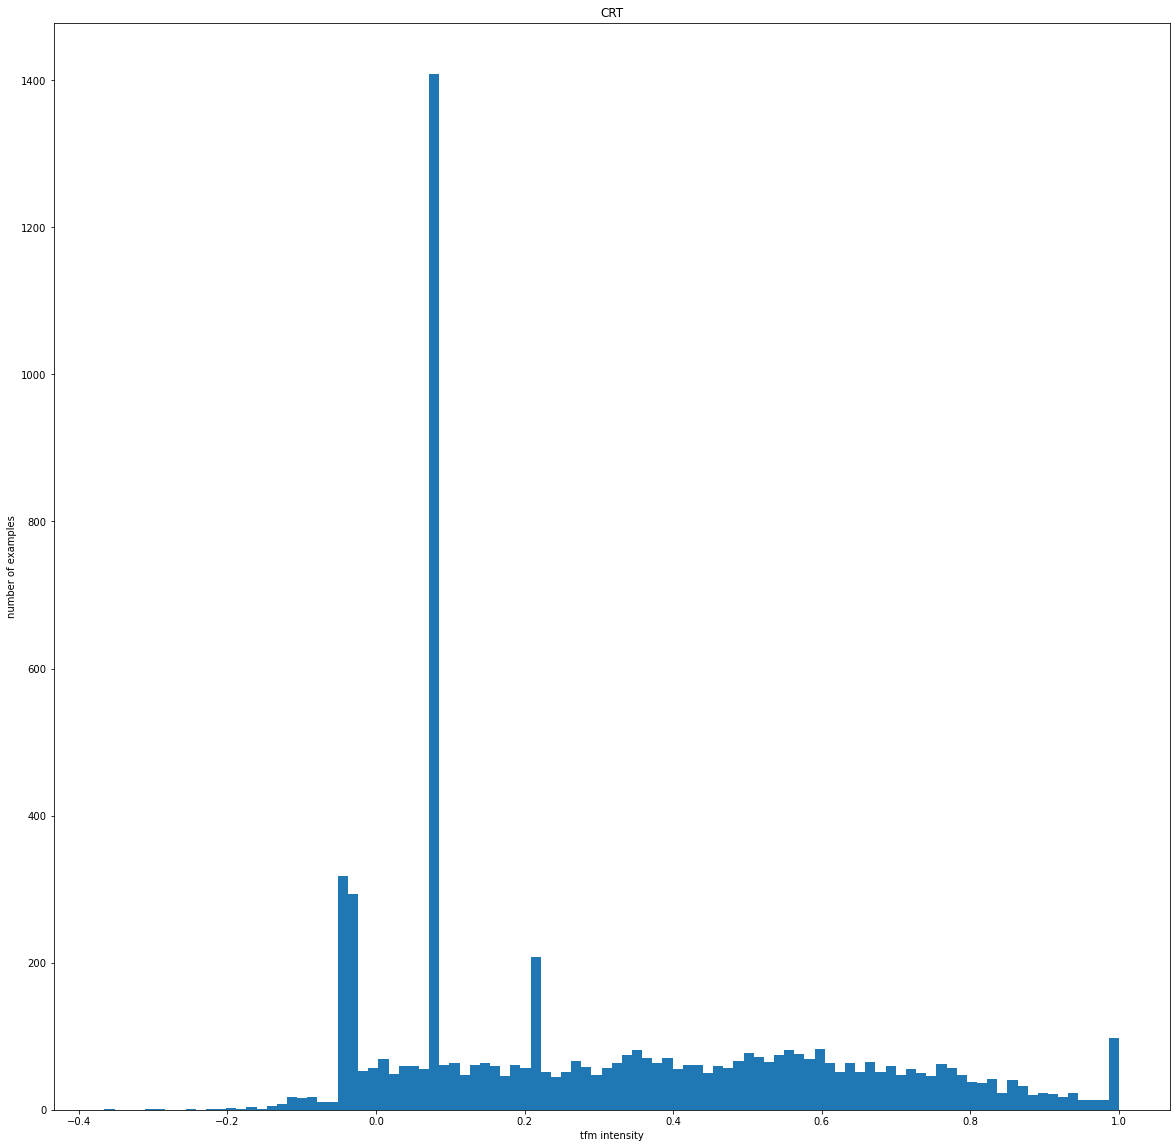

In [26]:
pltgroup(np.asarray(all_int_list))

In [27]:
X = np.asarray(X)
Y = np.asarray(all_int_list)
print(X.shape)  # regression from 10 values (max amino acid length)
print(Y.shape)  # To 5 values (each MHC complex)

(6283, 10)
(6283, 1)


In [28]:
len(core_seqs_dict)

6010

In [29]:
## train/test split based on the core 8 AA sequences
coretrainall, coretest = train_test_split(range(0, len(core_seqs_dict)), test_size=0.10, random_state=42)
# split train into train/validation
coretrain, coreval = train_test_split(coretrainall, test_size=0.20, random_state=42)

In [30]:
coretrain[0:10]

[4056, 2175, 215, 75, 4603, 4909, 5255, 4997, 1921, 3096]

In [31]:
print(len(coretrainall))
print(len(coretrain))
print(len(coreval))
print(len(coretest))
print(len(coretrain)+ len(coretest)+len(coreval))

5409
4327
1082
601
6010


In [32]:
## use those indexes in the dictionary core_seq_dict to assign actual training and testing
tmplist = [core_seqs_dict[x] for x in coretrain]
trainindex = []
for x in tmplist:
    trainindex+=x
len(trainindex)

4522

In [33]:
## use those indexes in the dictionary core_seq_dict to assign actual training and testing
tmplist = [core_seqs_dict[x] for x in coreval]
valindex = []
for x in tmplist:
    valindex+=x
len(valindex)

1132

In [34]:
## use those indexes in the dictionary core_seq_dict to assign actual training and testing
tmplist = [core_seqs_dict[j] for j in coretest]
testindex = []
for x in tmplist:
    testindex += x
len(testindex)

629

In [35]:
Xtrain = X[trainindex]
Xval = X[valindex]
Xtest = X[testindex]

Ytrain = Y[trainindex]
Yval = Y[valindex]
Ytest = Y[testindex]
print(len(Xtrain))
print(len(Xval))
print(len(Xtest))
print(len(Ytrain))
print(len(Yval))
print(len(Ytest))

4522
1132
629
4522
1132
629


In [36]:
Xtestseq = inp['Sequence'][testindex]

In [37]:
Y[testindex[0]]

array([0.08468665])

In [38]:
testindex[0:10]

[604, 2691, 5621, 5141, 2559, 5241, 5242, 1984, 562, 2076]

In [39]:
char_index

{'A': 0,
 'C': 1,
 'D': 2,
 'E': 3,
 'END': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'P': 13,
 'Q': 14,
 'R': 15,
 'S': 16,
 'T': 17,
 'V': 18,
 'W': 19,
 'Y': 20}

In [40]:
## compare order of xtestsequence version and xtest numeric encoding
Xtestseq[0:10]

604      CHKGWGVSV
2691     KSDGTGTIY
5621    VLNRHAITMY
5141     TIANSNIIK
2559     KLFKKTDFK
5241      TLYCVHQR
5242     TLYCVHQRI
1984     IEELREHLL
562      AVYSICKFY
2076     IIYYQLAGY
Name: Sequence, dtype: object

In [41]:
print(Xtest)

Ytest

[[ 1  7  9 ... 16 18  4]
 [ 9 16  2 ...  8 20  4]
 [18 10 12 ... 17 11 20]
 ...
 [15  0 11 ...  7 15  4]
 [15  8 11 ...  5  6  9]
 [15 10 11 ... 10  8  4]]


array([[ 8.46866460e-02],
       [ 8.46866460e-02],
       [ 3.64742357e-01],
       [ 6.66850905e-01],
       [ 7.98402748e-01],
       [ 5.64729509e-01],
       [ 2.62595260e-02],
       [-4.10069700e-02],
       [ 3.93477027e-01],
       [ 5.39731674e-01],
       [ 7.16020853e-01],
       [ 2.12812595e-01],
       [ 3.84940524e-01],
       [ 8.46866460e-02],
       [ 4.66723795e-01],
       [ 5.59283476e-01],
       [ 1.69569900e-01],
       [-2.30637450e-02],
       [ 1.63945741e-01],
       [ 1.29123322e-01],
       [ 5.53215417e-01],
       [ 8.46866460e-02],
       [ 8.46866460e-02],
       [-3.07903210e-02],
       [ 4.98367086e-01],
       [ 8.46866460e-02],
       [ 6.48312784e-01],
       [ 7.87822804e-01],
       [ 6.52822372e-01],
       [ 3.85327886e-01],
       [ 3.26225729e-01],
       [ 7.23702736e-01],
       [ 8.46866460e-02],
       [ 8.46866460e-02],
       [ 8.46866460e-02],
       [ 3.07288549e-01],
       [ 2.65872515e-01],
       [ 8.46866460e-02],
       [ 8.4

In [42]:
## save numpy arrays of each for the hyperas hyperparameter search loop
np.savetxt('20210524_A1101_xtrain.txt', Xtrain)
np.savetxt('20210524_A1101_xval.txt', Xval)
np.savetxt('20210524_A1101_xtest.txt', Xtest)
np.savetxt('20210524_A1101_ytrain.txt', Ytrain)
np.savetxt('20210524_A1101_yval.txt', Yval)
np.savetxt('20210524_A1101_ytest.txt', Ytest)

In [43]:
Ytrain

array([[0.480269  ],
       [0.08468665],
       [0.36028362],
       ...,
       [0.08468665],
       [0.08468665],
       [0.39413205]])

### check that the train and test sets have similar class distro

In [44]:
print(np.loadtxt('20210429_CRT_CCS_ytrain.txt'))

[383.9534014  341.2742951  322.6715301  ... 317.9521273  372.11204427
 357.52811655]


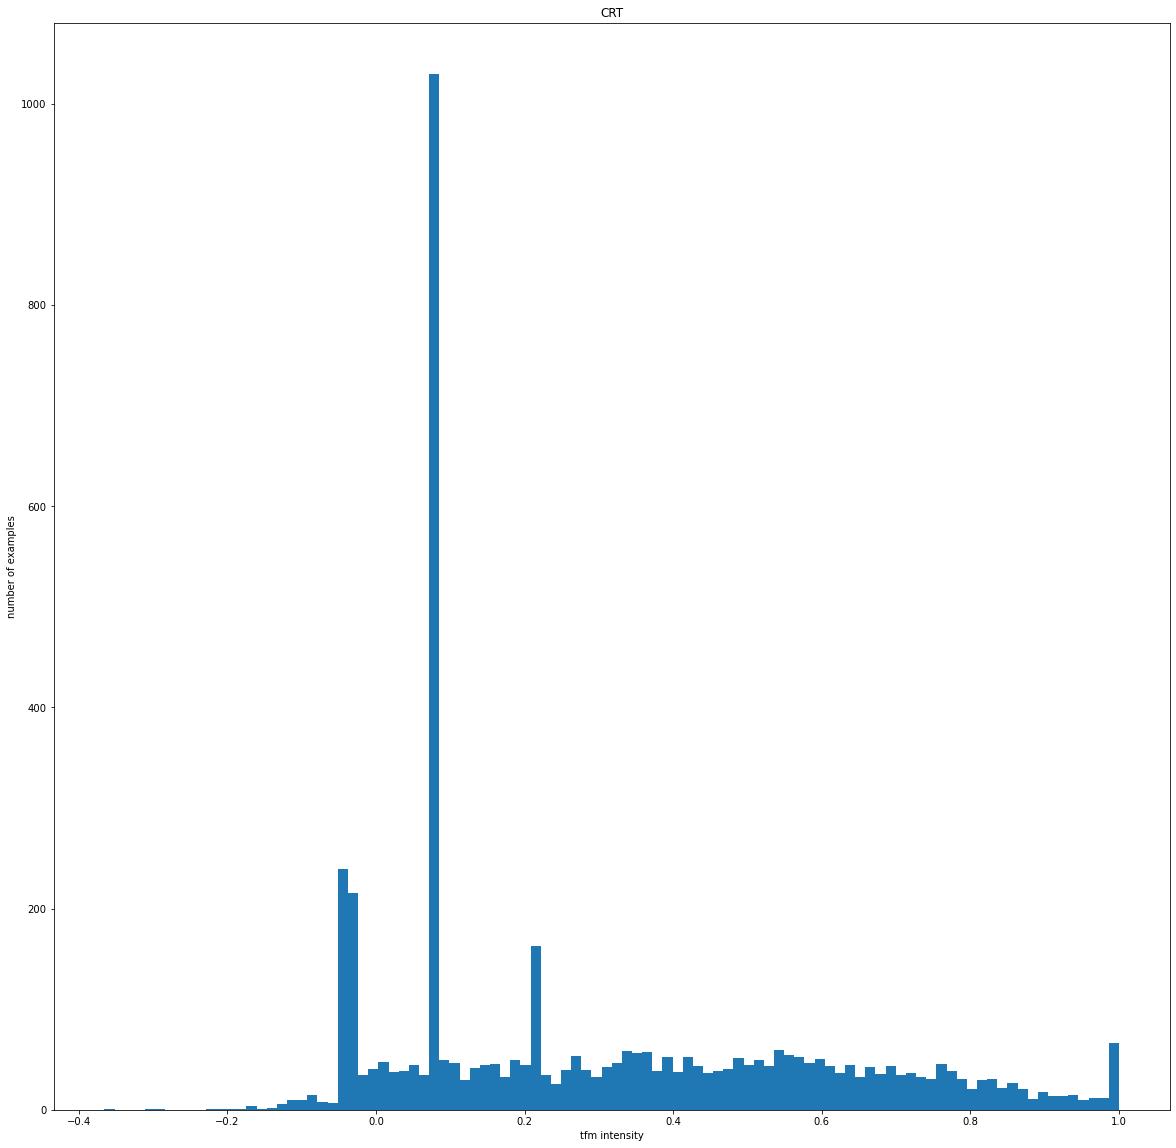

In [65]:
pltgroup(np.loadtxt('20210524_A1101_ytrain.txt')) # train set

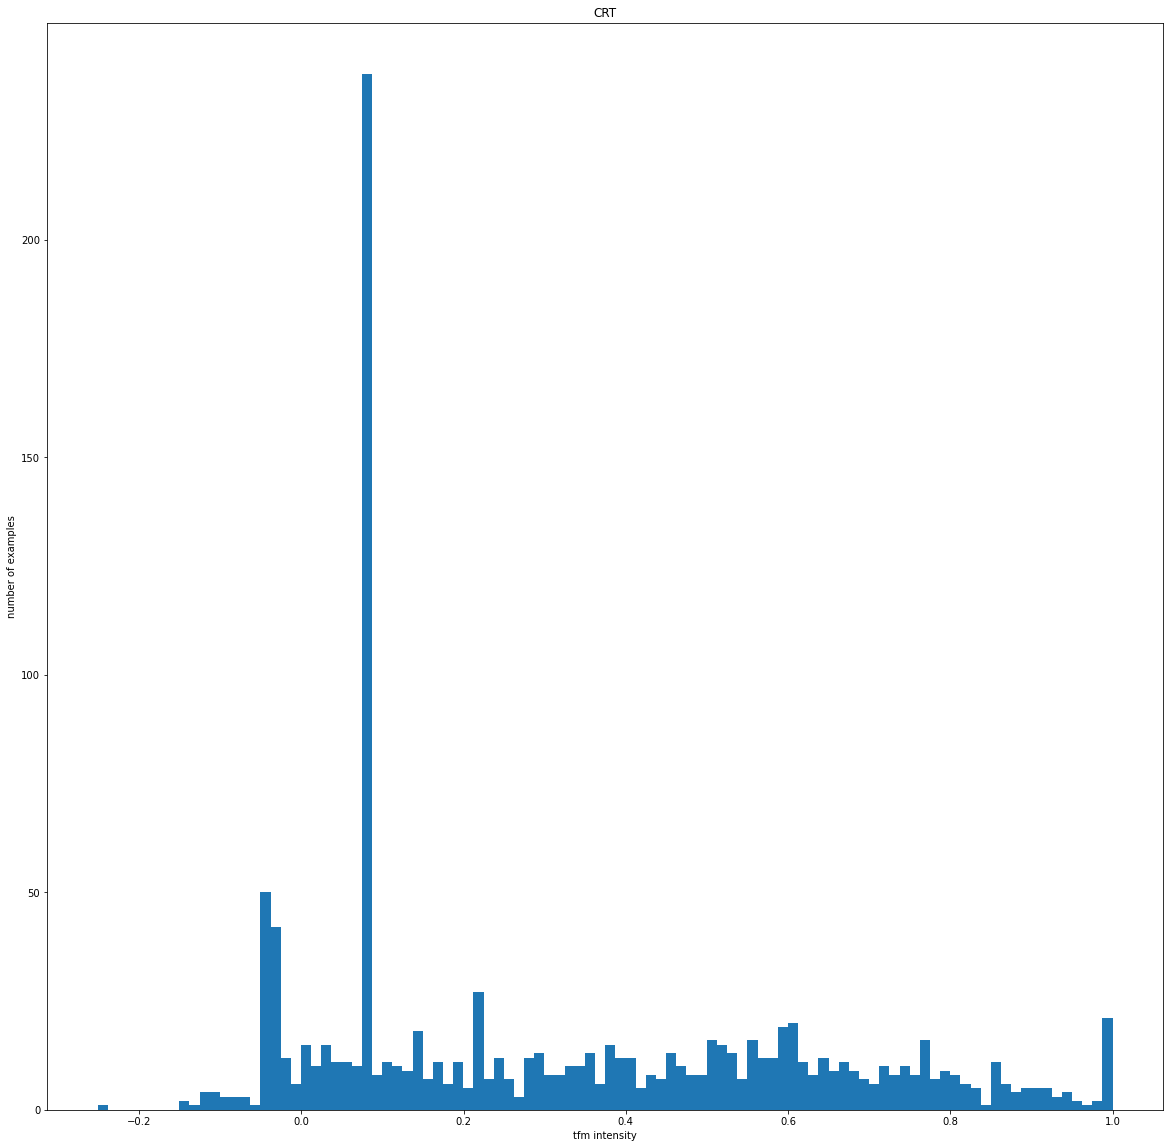

In [64]:
pltgroup(np.loadtxt('20210524_A1101_yval.txt')) # validation set

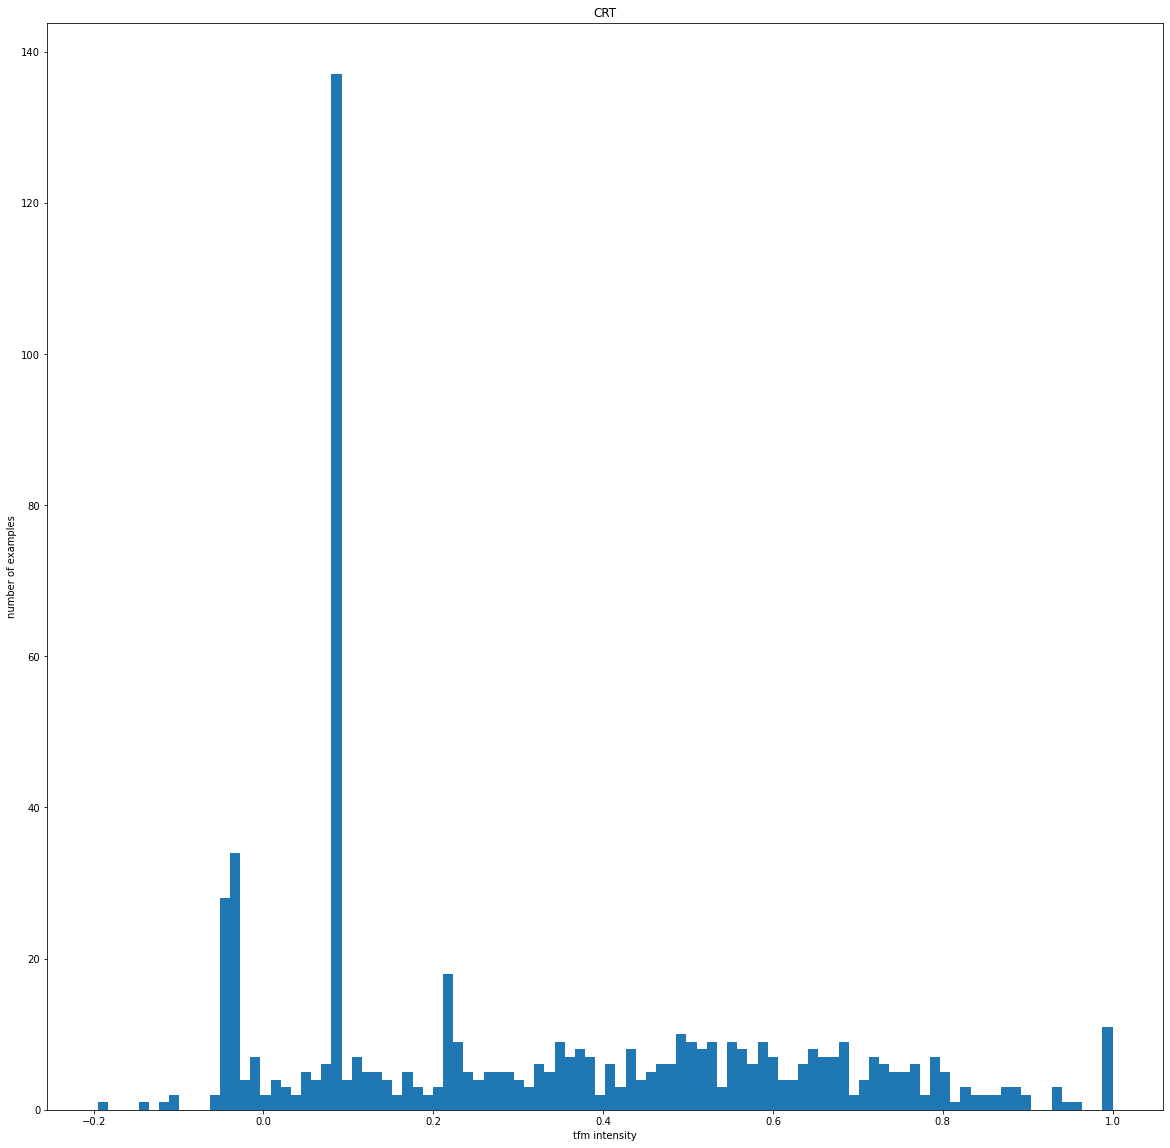

In [66]:
pltgroup(np.loadtxt('20210524_A1101_ytest.txt')) # test set

# quick test one parameter set showing model works

In [48]:
keras.__version__
tf.__version__

'2.3.1'

In [ ]:
#Model for MAMU alleles

os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"
X_train = np.loadtxt('20201230_all5_xtrain.txt')
X_val = np.loadtxt('20201230_all5_xval.txt')
Y_train = np.loadtxt('20201230_all5_ytrain.txt')
Y_val = np.loadtxt('20201230_all5_yval.txt')

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(output_dim=50 , input_dim=21, input_length=10))

model.add(tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(10,21)))
model.add(tf.keras.layers.Dropout(0.48386820999386737))
model.add(tf.keras.layers.LSTM(128, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.1829057341070159))
#model.add(tf.keras.layers.LSTM(128, return_sequences=False))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64))

model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
#model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.11769401187577534))

model.add(tf.keras.layers.Dense(1))
optimizermodel = tf.keras.optimizers.Adam(0.001)
optimizermodel.learning_rate.assign(0.005)
#print(optimizer.learning_rate)
model.compile(loss='mse', optimizer = optimizermodel,  metrics=['mse'])

hist = model.fit(X_train, Y_train,
          batch_size=5000,
          epochs= 1000,
          verbose=2,
          validation_data=(X_val, Y_val))


Epoch 1/1000
9/9 - 7s - loss: 0.5291 - mse: 0.5291 - val_loss: 0.4190 - val_mse: 0.4190
Epoch 2/1000
9/9 - 6s - loss: 0.4322 - mse: 0.4322 - val_loss: 0.4094 - val_mse: 0.4094
Epoch 3/1000
9/9 - 6s - loss: 0.4093 - mse: 0.4093 - val_loss: 0.3933 - val_mse: 0.3933
Epoch 4/1000
9/9 - 6s - loss: 0.3973 - mse: 0.3973 - val_loss: 0.3848 - val_mse: 0.3848
Epoch 5/1000
9/9 - 6s - loss: 0.3913 - mse: 0.3913 - val_loss: 0.3811 - val_mse: 0.3811
Epoch 6/1000
9/9 - 6s - loss: 0.3892 - mse: 0.3892 - val_loss: 0.3802 - val_mse: 0.3802
Epoch 7/1000
9/9 - 6s - loss: 0.3873 - mse: 0.3873 - val_loss: 0.3779 - val_mse: 0.3779
Epoch 8/1000
9/9 - 6s - loss: 0.3843 - mse: 0.3843 - val_loss: 0.3745 - val_mse: 0.3745
Epoch 9/1000
9/9 - 6s - loss: 0.3819 - mse: 0.3819 - val_loss: 0.3727 - val_mse: 0.3727
Epoch 10/1000
9/9 - 6s - loss: 0.3796 - mse: 0.3796 - val_loss: 0.3709 - val_mse: 0.3709
Epoch 11/1000
9/9 - 6s - loss: 0.3776 - mse: 0.3776 - val_loss: 0.3695 - val_mse: 0.3695
Epoch 12/1000
9/9 - 6s - loss:

9/9 - 5s - loss: 0.3259 - mse: 0.3259 - val_loss: 0.3253 - val_mse: 0.3253
Epoch 94/1000
9/9 - 5s - loss: 0.3261 - mse: 0.3261 - val_loss: 0.3258 - val_mse: 0.3258
Epoch 95/1000
9/9 - 5s - loss: 0.3259 - mse: 0.3259 - val_loss: 0.3256 - val_mse: 0.3256
Epoch 96/1000
9/9 - 5s - loss: 0.3258 - mse: 0.3258 - val_loss: 0.3250 - val_mse: 0.3250
Epoch 97/1000
9/9 - 5s - loss: 0.3254 - mse: 0.3254 - val_loss: 0.3250 - val_mse: 0.3250
Epoch 98/1000
9/9 - 5s - loss: 0.3253 - mse: 0.3253 - val_loss: 0.3248 - val_mse: 0.3248
Epoch 99/1000
9/9 - 5s - loss: 0.3254 - mse: 0.3254 - val_loss: 0.3249 - val_mse: 0.3249
Epoch 100/1000
9/9 - 5s - loss: 0.3257 - mse: 0.3257 - val_loss: 0.3250 - val_mse: 0.3250
Epoch 101/1000
9/9 - 5s - loss: 0.3254 - mse: 0.3254 - val_loss: 0.3248 - val_mse: 0.3248
Epoch 102/1000
9/9 - 5s - loss: 0.3252 - mse: 0.3252 - val_loss: 0.3247 - val_mse: 0.3247
Epoch 103/1000
9/9 - 5s - loss: 0.3252 - mse: 0.3252 - val_loss: 0.3247 - val_mse: 0.3247
Epoch 104/1000
9/9 - 5s - loss:

Epoch 185/1000
9/9 - 5s - loss: 0.3221 - mse: 0.3221 - val_loss: 0.3247 - val_mse: 0.3247
Epoch 186/1000
9/9 - 5s - loss: 0.3221 - mse: 0.3221 - val_loss: 0.3241 - val_mse: 0.3241
Epoch 187/1000
9/9 - 5s - loss: 0.3220 - mse: 0.3220 - val_loss: 0.3240 - val_mse: 0.3240
Epoch 188/1000
9/9 - 5s - loss: 0.3219 - mse: 0.3219 - val_loss: 0.3241 - val_mse: 0.3241
Epoch 189/1000
9/9 - 5s - loss: 0.3219 - mse: 0.3219 - val_loss: 0.3241 - val_mse: 0.3241
Epoch 190/1000
9/9 - 5s - loss: 0.3219 - mse: 0.3219 - val_loss: 0.3243 - val_mse: 0.3243
Epoch 191/1000
9/9 - 5s - loss: 0.3218 - mse: 0.3218 - val_loss: 0.3239 - val_mse: 0.3239
Epoch 192/1000
9/9 - 5s - loss: 0.3218 - mse: 0.3218 - val_loss: 0.3242 - val_mse: 0.3242
Epoch 193/1000
9/9 - 5s - loss: 0.3217 - mse: 0.3217 - val_loss: 0.3239 - val_mse: 0.3239
Epoch 194/1000
9/9 - 5s - loss: 0.3217 - mse: 0.3217 - val_loss: 0.3239 - val_mse: 0.3239
Epoch 195/1000
9/9 - 5s - loss: 0.3217 - mse: 0.3217 - val_loss: 0.3239 - val_mse: 0.3239
Epoch 196/

9/9 - 5s - loss: 0.3204 - mse: 0.3204 - val_loss: 0.3249 - val_mse: 0.3249
Epoch 277/1000
9/9 - 5s - loss: 0.3205 - mse: 0.3205 - val_loss: 0.3245 - val_mse: 0.3245
Epoch 278/1000
9/9 - 5s - loss: 0.3204 - mse: 0.3204 - val_loss: 0.3245 - val_mse: 0.3245
Epoch 279/1000
9/9 - 5s - loss: 0.3203 - mse: 0.3203 - val_loss: 0.3245 - val_mse: 0.3245
Epoch 280/1000
9/9 - 5s - loss: 0.3203 - mse: 0.3203 - val_loss: 0.3244 - val_mse: 0.3244
Epoch 281/1000
9/9 - 5s - loss: 0.3203 - mse: 0.3203 - val_loss: 0.3245 - val_mse: 0.3245
Epoch 282/1000
9/9 - 5s - loss: 0.3204 - mse: 0.3204 - val_loss: 0.3253 - val_mse: 0.3253
Epoch 283/1000
9/9 - 5s - loss: 0.3205 - mse: 0.3205 - val_loss: 0.3246 - val_mse: 0.3246
Epoch 284/1000
9/9 - 5s - loss: 0.3203 - mse: 0.3203 - val_loss: 0.3246 - val_mse: 0.3246
Epoch 285/1000
9/9 - 5s - loss: 0.3204 - mse: 0.3204 - val_loss: 0.3244 - val_mse: 0.3244
Epoch 286/1000
9/9 - 5s - loss: 0.3204 - mse: 0.3204 - val_loss: 0.3245 - val_mse: 0.3245
Epoch 287/1000
9/9 - 5s -

Epoch 368/1000
9/9 - 5s - loss: 0.3194 - mse: 0.3194 - val_loss: 0.3251 - val_mse: 0.3251
Epoch 369/1000
9/9 - 5s - loss: 0.3194 - mse: 0.3194 - val_loss: 0.3253 - val_mse: 0.3253
Epoch 370/1000
9/9 - 5s - loss: 0.3194 - mse: 0.3194 - val_loss: 0.3254 - val_mse: 0.3254
Epoch 371/1000
9/9 - 5s - loss: 0.3195 - mse: 0.3195 - val_loss: 0.3257 - val_mse: 0.3257
Epoch 372/1000
9/9 - 5s - loss: 0.3193 - mse: 0.3193 - val_loss: 0.3254 - val_mse: 0.3254
Epoch 373/1000
9/9 - 5s - loss: 0.3194 - mse: 0.3194 - val_loss: 0.3255 - val_mse: 0.3255
Epoch 374/1000
9/9 - 5s - loss: 0.3194 - mse: 0.3194 - val_loss: 0.3254 - val_mse: 0.3254
Epoch 375/1000
9/9 - 5s - loss: 0.3193 - mse: 0.3193 - val_loss: 0.3256 - val_mse: 0.3256
Epoch 376/1000
9/9 - 5s - loss: 0.3194 - mse: 0.3194 - val_loss: 0.3256 - val_mse: 0.3256
Epoch 377/1000
9/9 - 5s - loss: 0.3197 - mse: 0.3197 - val_loss: 0.3263 - val_mse: 0.3263
Epoch 378/1000
9/9 - 5s - loss: 0.3198 - mse: 0.3198 - val_loss: 0.3258 - val_mse: 0.3258
Epoch 379/

9/9 - 5s - loss: 0.3187 - mse: 0.3187 - val_loss: 0.3265 - val_mse: 0.3265
Epoch 460/1000
9/9 - 5s - loss: 0.3187 - mse: 0.3187 - val_loss: 0.3269 - val_mse: 0.3269
Epoch 461/1000
9/9 - 5s - loss: 0.3187 - mse: 0.3187 - val_loss: 0.3266 - val_mse: 0.3266
Epoch 462/1000
9/9 - 5s - loss: 0.3187 - mse: 0.3187 - val_loss: 0.3270 - val_mse: 0.3270
Epoch 463/1000
9/9 - 5s - loss: 0.3186 - mse: 0.3186 - val_loss: 0.3265 - val_mse: 0.3265
Epoch 464/1000
9/9 - 5s - loss: 0.3186 - mse: 0.3186 - val_loss: 0.3268 - val_mse: 0.3268
Epoch 465/1000
9/9 - 5s - loss: 0.3187 - mse: 0.3187 - val_loss: 0.3265 - val_mse: 0.3265
Epoch 466/1000
9/9 - 5s - loss: 0.3186 - mse: 0.3186 - val_loss: 0.3267 - val_mse: 0.3267
Epoch 467/1000
9/9 - 5s - loss: 0.3185 - mse: 0.3185 - val_loss: 0.3265 - val_mse: 0.3265
Epoch 468/1000
9/9 - 5s - loss: 0.3186 - mse: 0.3186 - val_loss: 0.3266 - val_mse: 0.3266
Epoch 469/1000
9/9 - 5s - loss: 0.3187 - mse: 0.3187 - val_loss: 0.3274 - val_mse: 0.3274
Epoch 470/1000
9/9 - 5s -

Epoch 551/1000
9/9 - 6s - loss: 0.3181 - mse: 0.3181 - val_loss: 0.3276 - val_mse: 0.3276
Epoch 552/1000
9/9 - 5s - loss: 0.3180 - mse: 0.3180 - val_loss: 0.3277 - val_mse: 0.3277
Epoch 553/1000
9/9 - 5s - loss: 0.3180 - mse: 0.3180 - val_loss: 0.3275 - val_mse: 0.3275
Epoch 554/1000
9/9 - 5s - loss: 0.3181 - mse: 0.3181 - val_loss: 0.3277 - val_mse: 0.3277
Epoch 555/1000
9/9 - 6s - loss: 0.3181 - mse: 0.3181 - val_loss: 0.3275 - val_mse: 0.3275
Epoch 556/1000
9/9 - 5s - loss: 0.3180 - mse: 0.3180 - val_loss: 0.3279 - val_mse: 0.3279
Epoch 557/1000
9/9 - 6s - loss: 0.3181 - mse: 0.3181 - val_loss: 0.3277 - val_mse: 0.3277
Epoch 558/1000
9/9 - 6s - loss: 0.3181 - mse: 0.3181 - val_loss: 0.3276 - val_mse: 0.3276
Epoch 559/1000
9/9 - 6s - loss: 0.3181 - mse: 0.3181 - val_loss: 0.3282 - val_mse: 0.3282
Epoch 560/1000
9/9 - 5s - loss: 0.3180 - mse: 0.3180 - val_loss: 0.3280 - val_mse: 0.3280
Epoch 561/1000
9/9 - 5s - loss: 0.3181 - mse: 0.3181 - val_loss: 0.3276 - val_mse: 0.3276
Epoch 562/

In [79]:
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="True"
X_train = np.loadtxt('20210524_A1101_xtrain.txt')
X_val = np.loadtxt('20210524_A1101_xval.txt')
Y_train = np.loadtxt('20210524_A1101_ytrain.txt')
Y_val = np.loadtxt('20210524_A1101_yval.txt')

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(output_dim=50 , input_dim=21, input_length=10))

model.add(tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(10,21)))
model.add(tf.keras.layers.Dropout(0.44))
model.add(tf.keras.layers.LSTM(128, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.LSTM(128, return_sequences=False))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64))

model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
#model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.05))

model.add(tf.keras.layers.Dense(1))
optimizermodel = tf.keras.optimizers.Adam(0.001)
optimizermodel.learning_rate.assign(0.005)
#print(optimizer.learning_rate)
model.compile(loss='mse', optimizer = optimizermodel,  metrics=['mse'])

hist = model.fit(X_train, Y_train,
          batch_size=32,
          epochs= 100,
          verbose=2,
          validation_data=(X_val, Y_val))


Epoch 1/100
142/142 - 4s - loss: 0.0565 - mse: 0.0565 - val_loss: 0.0441 - val_mse: 0.0441
Epoch 2/100
142/142 - 3s - loss: 0.0423 - mse: 0.0423 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 3/100
142/142 - 3s - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 4/100
142/142 - 3s - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0399 - val_mse: 0.0399
Epoch 5/100
142/142 - 3s - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 6/100
142/142 - 3s - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 7/100
142/142 - 3s - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 8/100
142/142 - 3s - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 9/100
142/142 - 3s - loss: 0.0262 - mse: 0.0262 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 10/100
142/142 - 3s - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 11/100
142/142 - 3s - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0270 - val_mse: 0.02

Epoch 91/100
142/142 - 3s - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 92/100
142/142 - 3s - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 93/100
142/142 - 3s - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 94/100
142/142 - 3s - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 95/100
142/142 - 3s - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 96/100
142/142 - 3s - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 97/100
142/142 - 3s - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 98/100
142/142 - 3s - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 99/100
142/142 - 3s - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 100/100
142/142 - 3s - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0335 - val_mse: 0.0335


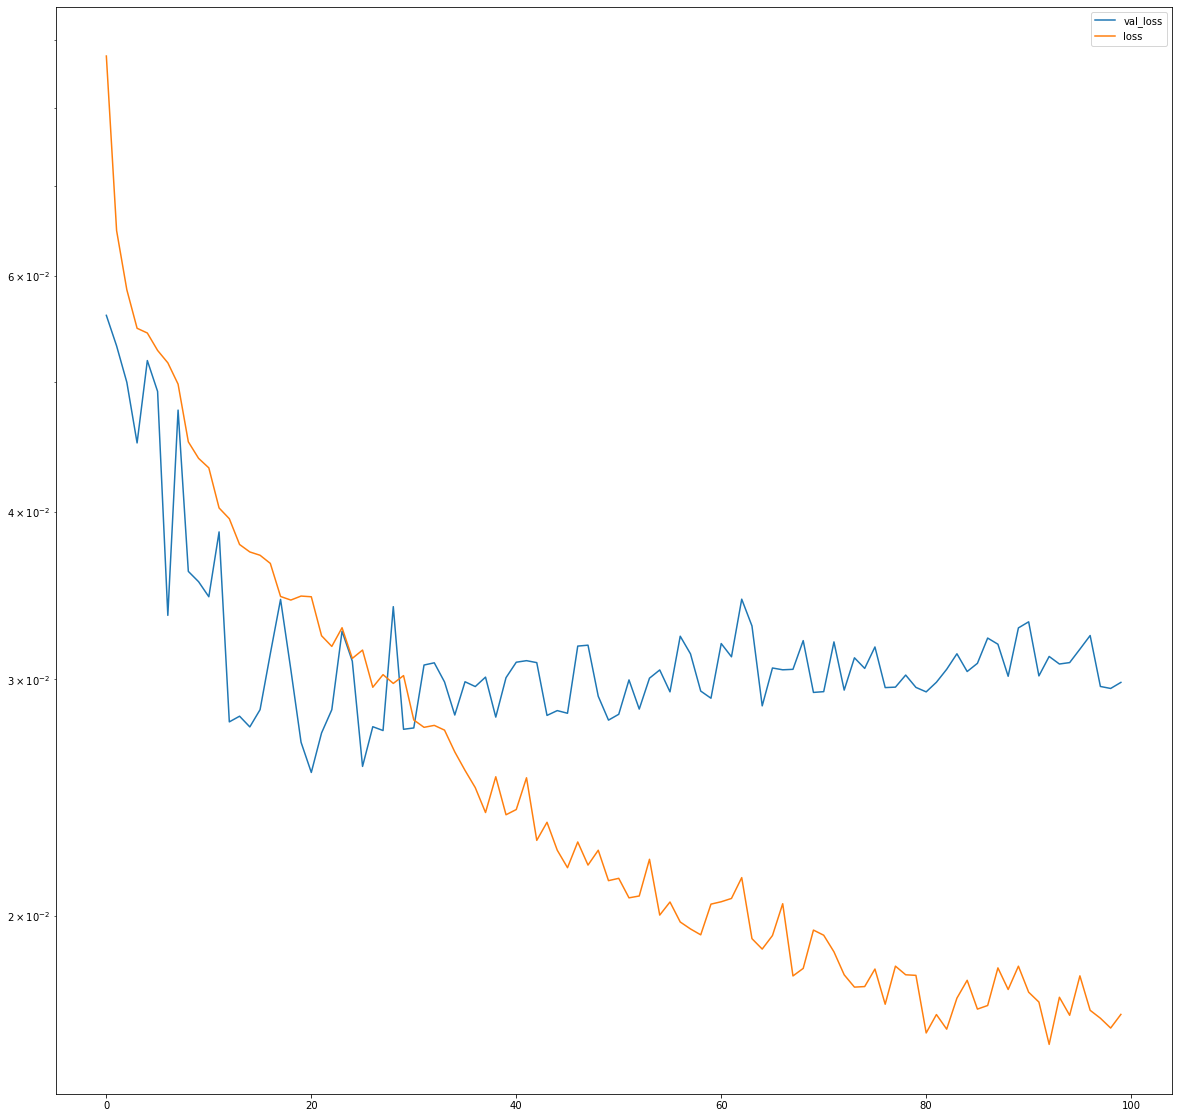

In [71]:
# plot validation and training loss to assess overfitting
plt.semilogy(hist.history['val_loss'])
plt.semilogy(hist.history['loss'])
plt.legend(['val_loss', 'loss'])

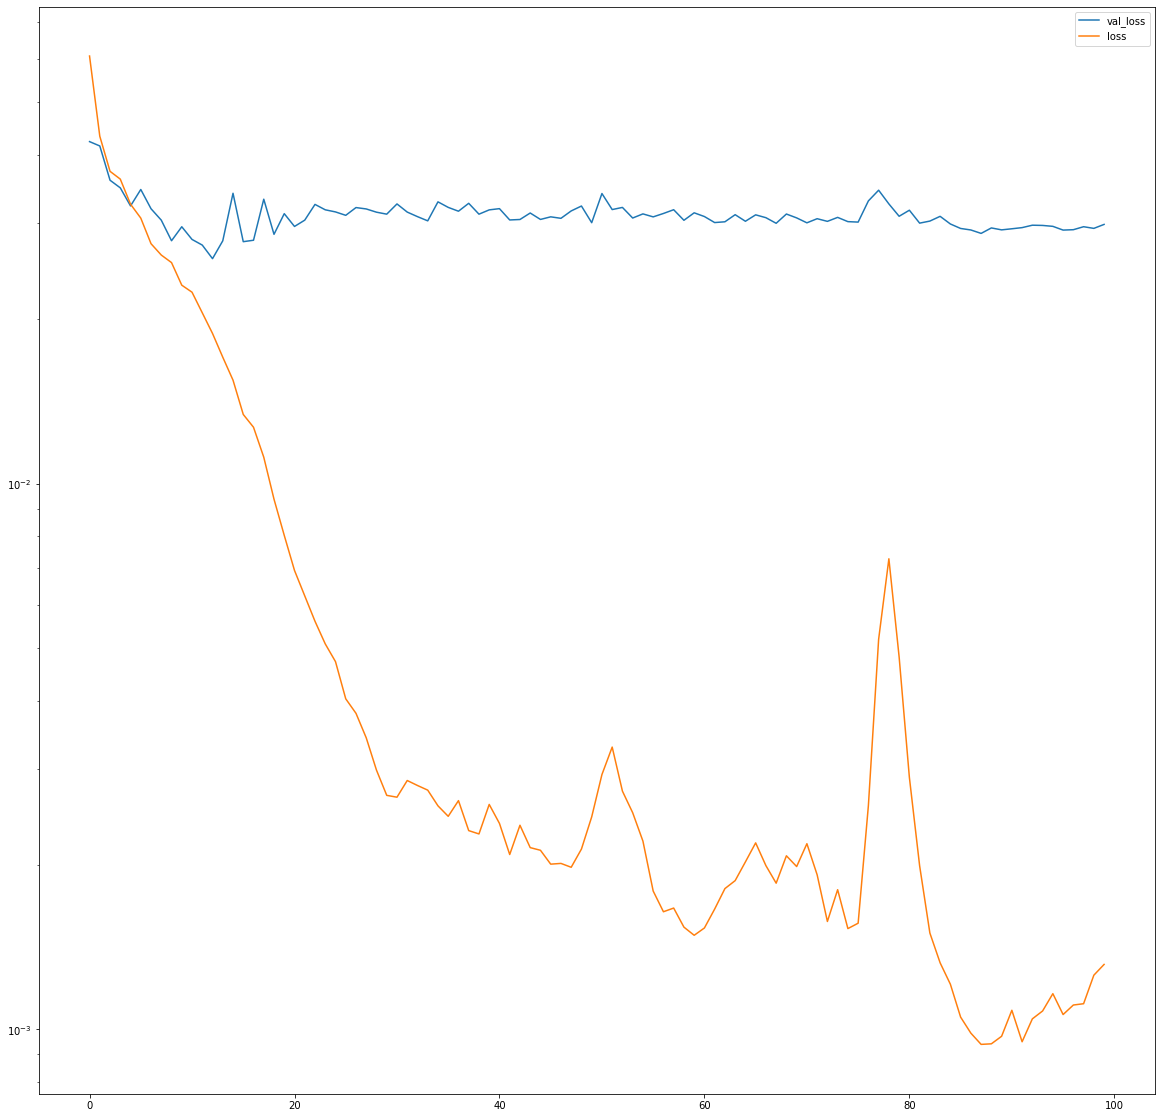

In [53]:
# without batchnorm looks similar 
plt.semilogy(hist.history['val_loss'])
plt.semilogy(hist.history['loss'])
plt.legend(['val_loss', 'loss'])

### trained on the raw intensity output so no need to inverse_transform 

In [175]:
model.summary() # best model architecture

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 10, 50)            1050      
_________________________________________________________________
lstm_46 (LSTM)               (None, 10, 128)           91648     
_________________________________________________________________
dropout_65 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
dense_42 (Dense)             (None, 10, 64)            8256      
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 10, 64)            0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 10, 64)            0         
_________________________________________________________________
dense_43 (Dense)             (None, 10, 1)           

In [72]:
model.save('20210524_A1101_overfit_highdropout.model') # save model for later

INFO:tensorflow:Assets written to: 20210524_A1101_overfit_highdropout.model\assets


In [6]:
def data():
    X_train = np.loadtxt('20210429_CRT_CCS_xtrain.txt')
    X_test = np.loadtxt('20210429_CRT_CCS_xtest.txt')
    Y_train = np.loadtxt('20210429_CRT_CCS_ytrain.txt')
    Y_test = np.loadtxt('20210429_CRT_CCS_ytest.txt')
    return X_train, Y_train, X_test, Y_test

def model(X_train, Y_train, X_test, Y_test):
    '''
    Model providing function:
    Create Keras model with double curly brackets dropped-in as needed.
    Return value has to be a valid python dictionary with two customary keys:
        - loss: Specify a numeric evaluation metric to be minimized
        - status: Just use STATUS_OK and see hyperopt documentation if not feasible
    The last one is optional, though recommended, namely:
        - model: specify the model just created so that we can later use it again.
    '''
    model = Sequential()
    model.add(Embedding(output_dim=50 , input_dim=21, input_length=10))
    model.add(LSTM(128, return_sequences=False, input_shape=(10,21)))
    model.add(Dropout({{uniform(0, 0.8)}}))
    #model.add(LSTM(128, return_sequences=False))
    #model.add(Dropout({{uniform(0, 0.6)}}))
    model.add(Dense(64))
    #model.add(keras.layers.LeakyReLU(alpha=0.3))
    #model.add(BatchNormalization())
    model.add(Dropout({{uniform(0, 0.8)}}))
    model.add(Dense(1))
    optimizermodel = tf.keras.optimizers.Adam(0.001)
    optimizermodel.learning_rate.assign({{choice([0.001, 0.005, 0.01, 0.05, 0.1])}})
    #print(optimizer.learning_rate)
    model.compile(loss='mse', optimizer = optimizermodel,  metrics=['mse'])
    
    model.compile(loss='mse', 
                  optimizer='adam', 
                  metrics=['mse'])

    model.fit(X_train, Y_train,
              batch_size={{choice([32, 64, 128, 256])}},
              epochs= {{choice([ 100, 500, 1000])}},
              verbose=0,
              validation_data=(X_test, Y_test))
    
    score, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': acc, 'status': STATUS_OK, 'model': model} #put negative sign in from of 'acc' for accuracy metric

best_run0, best_model0 = optim.minimize(model=model,
                                      notebook_name='20201230_train_new_model_MHC_all5',
                                      data=data,
                                      max_evals=1,
                                      algo=tpe.suggest,
                                      trials = Trials())

best_model0.save('20210505_testhyperparameter.model')

print(best_run0)

>>> Imports:
#coding=utf-8

try:
    from time import time
except:
    pass

try:
    from sklearn.preprocessing import RobustScaler, PowerTransformer
except:
    pass

try:
    from sklearn.preprocessing import MaxAbsScaler
except:
    pass

try:
    from sklearn.preprocessing import MinMaxScaler
except:
    pass

try:
    from sklearn.preprocessing import OneHotEncoder
except:
    pass

try:
    from sklearn.ensemble import RandomForestClassifier
except:
    pass

try:
    from sklearn.preprocessing import StandardScaler
except:
    pass

try:
    from sklearn import metrics
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from sklearn.linear_model import LogisticRegression
except:
    pass

try:
    from sklearn.metrics import mean_squared_error
except:
    pass

try:
    from sklearn.dummy import *
except:
    pass

try:
    from sklearn.model_selection import RandomizedSearchCV, KFold
except:
    pass

try:
    from sklearn

KeyboardInterrupt: 

In [4]:
print (best_run0)

{'Dropout': 0.04999730587706014, 'Dropout_1': 0.295346240262041, 'Dropout_2': 0.3257983840159514, 'assign': 4, 'batch_size': 2, 'epochs': 0}


# Get model predictions, inverse transform, and compare

In [57]:
X_test = np.loadtxt('20210524_A1101_xtest.txt')
y_test = np.loadtxt('20210524_A1101_ytest.txt')

In [190]:
import tensorflow as tf

In [73]:
#from tensorflow.compat.v1.keras.backend import get_session
#tf.compat.v1.disable_v2_behavior()
#shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough
model = tf.keras.models.load_model('20210524_A1101_overfit_highdropout.model')

In [74]:
y_pred = model.predict(X_test)
#y_pred_transform = mm.inverse_transform(y_pred)

In [75]:
y_pred.shape

(629, 1)

In [76]:
y_test.shape

(629,)

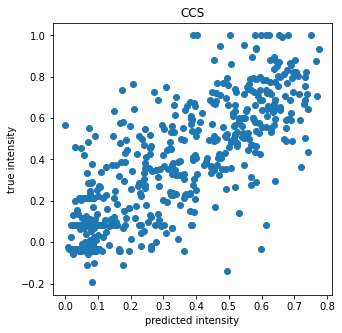

In [77]:

# wrong somehow
plt.rcParams['figure.figsize'] = [5, 5] 
fig, (ax1) = plt.subplots(1,1, sharex='row', sharey='row')
ax1.scatter(y_pred[:,0], y_test)


ax1.set_title("CCS")
plt.xlabel("predicted intensity")
plt.ylabel("true intensity")
plt.savefig('all5_new.svg')

In [78]:
import scipy
#print(y_pred[:,1])
#print(y_test)
print(scipy.stats.spearmanr(y_pred[:,0], y_test))
#scipy.stats.spearmanr(y_pred[:,1], y_test[:,1])


SpearmanrResult(correlation=0.7819096047814323, pvalue=8.409130531742077e-131)


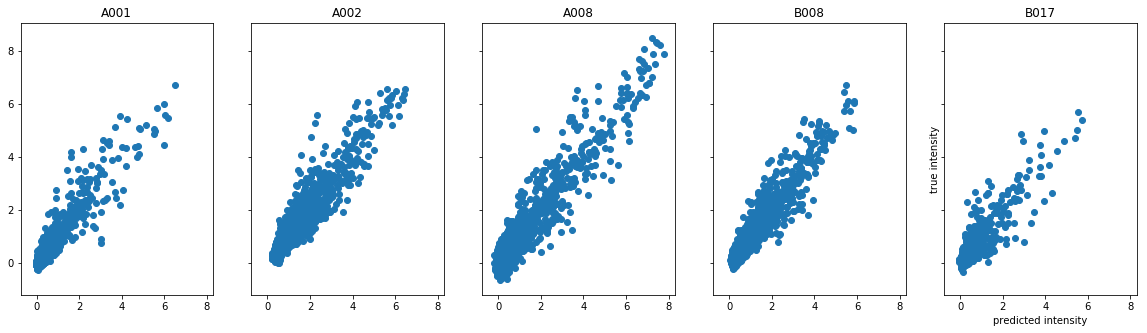

In [276]:
!# should look like these
plt.rcParams['figure.figsize'] = [20, 5] 
fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharex='row', sharey='row')
ax1.scatter(y_pred[:,0], y_test[:,0])
ax2.scatter(y_pred[:,1], y_test[:,1])
ax3.scatter(y_pred[:,2], y_test[:,2])
ax4.scatter(y_pred[:,3], y_test[:,3])
ax5.scatter(y_pred[:,4], y_test[:,4])
ax1.set_title("A001")
ax2.set_title("A002")
ax3.set_title("A008")
ax4.set_title("B008")
ax5.set_title("B017")
plt.xlabel("predicted intensity")
plt.ylabel("true intensity")
plt.savefig('all5_new_model_20201230.svg')

## Associate the peptide sequences back with predictions

In [ ]:
Xtestseq

In [268]:
pred_true_df = pd.DataFrame(data = y_pred, index=Xtestseq, 
                            columns = ['A001_pred','A002_pred','A008_pred','B008_pred','B017_pred', ])

In [269]:
pred_true_df

,A001_pred,A002_pred,A008_pred,B008_pred,B017_pred
PROBE_SEQUENCE,,,,,
WGIWRWGM,0.162688,0.662066,0.454396,0.403694,0.215551
WGIWRWGMM,0.161449,0.665118,0.441244,0.427286,0.223239
WGIWRWGMML,0.168123,0.678364,0.451995,0.427877,0.213953
NSNRTIIS,0.217164,1.157709,0.276914,0.896038,0.279982
NSNRTIISL,0.204166,1.183244,0.323566,0.840258,0.300076
NSNRTIISLN,0.211976,1.210395,0.322574,0.869359,0.298360
QRETWTVN,0.331257,2.034873,0.082667,3.408597,1.120423
QRETWTVND,0.123892,1.447079,0.213716,1.280466,0.707878
QRETWTVNDI,0.127413,1.303527,0.205784,1.036979,0.548822


In [248]:
ytest_trsfm = mm.inverse_transform(Ytest)

In [271]:
pred_true_df['A001_true'] = Ytest[:,0]
pred_true_df['A002_true'] = Ytest[:,1]
pred_true_df['A008_true'] = Ytest[:,2]
pred_true_df['B008_true'] = Ytest[:,3]
pred_true_df['B017_true'] = Ytest[:,4]

In [272]:
pred_true_df

,A001_pred,A002_pred,A008_pred,B008_pred,B017_pred,A001_true,A002_true,A008_true,B008_true,B017_true
PROBE_SEQUENCE,,,,,,,,,,
WGIWRWGM,0.162688,0.662066,0.454396,0.403694,0.215551,0.2415,0.6676,0.5323,0.4782,0.2876
WGIWRWGMM,0.161449,0.665118,0.441244,0.427286,0.223239,0.2343,0.7707,0.5266,0.6081,0.3778
WGIWRWGMML,0.168123,0.678364,0.451995,0.427877,0.213953,0.2018,0.6118,0.5382,0.6070,0.2825
NSNRTIIS,0.217164,1.157709,0.276914,0.896038,0.279982,0.2971,1.3504,-0.0443,0.8428,0.4088
NSNRTIISL,0.204166,1.183244,0.323566,0.840258,0.300076,0.1535,1.2071,0.6298,0.7134,0.2034
NSNRTIISLN,0.211976,1.210395,0.322574,0.869359,0.298360,0.2132,1.3256,0.2755,0.7537,0.2557
QRETWTVN,0.331257,2.034873,0.082667,3.408597,1.120423,-0.0038,1.4065,-0.0526,1.9874,0.3141
QRETWTVND,0.123892,1.447079,0.213716,1.280466,0.707878,0.1358,1.5437,0.1504,1.4274,0.4666
QRETWTVNDI,0.127413,1.303527,0.205784,1.036979,0.548822,0.1777,1.0227,0.7411,1.4790,0.0975


In [274]:
pred_true_df.to_csv('final_pred_true_all5.csv' , sep=',')

# load model and predict - for new sequences

In [8]:
from keras.models import load_model
model4 = load_model('MHC_10mer4mhc_raw_hyperas100_4.model')

In [19]:
## load new data
zika = pd.read_csv('Data/zikaFP_peptides.txt', header=None)
zika.head()
zika.values[0]

array(['GAKGRLSSGH'], dtype=object)

In [26]:
len(list(zika.values[0].tolist()[0]))

10

In [44]:
z10 = [x.tolist()[0] for x in zika.values if len(list(x.tolist()[0]))==10]
z10

['GAKGRLSSGH',
 'GTKVHVEETC',
 'VARVSPFGGL',
 'GTRQVMSMVS',
 'YEAPTQGSAS',
 'WGNGCGLFGK',
 'AHLALIAAFK',
 'PQEGTRQVMS',
 'VTVMAQDKPT',
 'ILAPTRVVAA',
 'KDLAAMLRII',
 'SIRETACLAK',
 'IPKSLAGPLS',
 'SHLMGRREEG',
 'LSMVGDWLEK',
 'YSLMAMATQA',
 'LVDRGWGNGC',
 'EEPMLVQSYG',
 'VDMQTLTPVG',
 'EEMSRIPGGR',
 'FVVTTDISEM',
 'DGLIASLYRP',
 'AEMDGAKGRL',
 'TRDAFPDSNS',
 'AQLPETLETI',
 'ILSRTAWGWG',
 'NQMEKGHRAL',
 'YSYKKSGITE',
 'ASISDMASDS',
 'STLWEGSPNK',
 'LMANAICSSV',
 'CIKVLCPYTS',
 'NRWGSVGKKE',
 'MWHVTKGSAL',
 'AVTLPSHSTR',
 'VALDYPAGTS',
 'RGSAKLRWLV',
 'EAEEVLEMQD',
 'GLPVRYMTTA',
 'GEKWKARLNQ',
 'TEIVDLMCHA',
 'LIRVENWIFR',
 'HGFGVFHTSV',
 'HKKGEARRSR',
 'DLVSYCGPWK',
 'TKGGPGHEEP',
 'PYTSTMMETL',
 'ETDEDHAHWL',
 'CHHKKGEARR',
 'IAVAVSSAIL',
 'PGGRMYADDT',
 'LGRMDGPRRP',
 'LVRVPLSRNS',
 'IVSYVVSGKS',
 'ENEALITNQM',
 'ECFEPSMLKK',
 'LAKSYAQMWQ',
 'ELPHGWKAWG',
 'SLKGKGSVKK',
 'QTAISALEGD',
 'ECPMLDEGVE',
 'EGDLMVLING',
 'LKRAHLIEMK',
 'MGQVLLIAVA',
 'LGYVLEEMSR',
 'KGETTDGVYR',
 'VVLGSQEG

In [47]:
# prep for embedding layer
char_index = dict((c, i) for i, c in enumerate(vocab))
z = []
z_name = [str(i)[0:maxlen] for i in z10]
for i in z_name:
  tmp = [char_index[j] for j in str(i)]
  for k in range(0,maxlen - len(str(i))):
      tmp.append(char_index["END"])
  z.append(tmp)

In [48]:
z

[[8, 14, 3, 8, 19, 4, 18, 18, 8, 1],
 [8, 13, 3, 2, 1, 2, 5, 5, 13, 17],
 [2, 14, 19, 2, 18, 12, 16, 8, 8, 4],
 [8, 13, 19, 10, 2, 11, 18, 11, 2, 18],
 [7, 5, 14, 12, 13, 10, 8, 18, 14, 18],
 [0, 8, 6, 8, 17, 8, 4, 16, 8, 3],
 [14, 1, 4, 14, 4, 9, 14, 14, 16, 3],
 [12, 10, 5, 8, 13, 19, 10, 2, 11, 18],
 [2, 13, 2, 11, 14, 10, 15, 3, 12, 13],
 [9, 4, 14, 12, 13, 19, 2, 2, 14, 14],
 [3, 15, 4, 14, 14, 11, 4, 19, 9, 9],
 [18, 9, 19, 5, 13, 14, 17, 4, 14, 3],
 [9, 12, 3, 18, 4, 14, 8, 12, 4, 18],
 [18, 1, 4, 11, 8, 19, 19, 5, 5, 8],
 [4, 18, 11, 2, 8, 15, 0, 4, 5, 3],
 [7, 18, 4, 11, 14, 11, 14, 13, 10, 14],
 [4, 2, 15, 19, 8, 0, 8, 6, 8, 17],
 [5, 5, 12, 11, 4, 2, 10, 18, 7, 8],
 [2, 15, 11, 10, 13, 4, 13, 12, 2, 8],
 [5, 5, 11, 18, 19, 9, 12, 8, 8, 19],
 [16, 2, 2, 13, 13, 15, 9, 18, 5, 11],
 [15, 8, 4, 9, 14, 18, 4, 7, 19, 12],
 [14, 5, 11, 15, 8, 14, 3, 8, 19, 4],
 [13, 19, 15, 14, 16, 12, 15, 18, 6, 18],
 [14, 10, 4, 12, 5, 13, 4, 5, 13, 9],
 [9, 4, 18, 19, 13, 14, 0, 8, 0, 8],
 [6, 1

In [49]:
len(z)

3410

In [22]:
len(zika.values[0].tolist())

1

In [52]:
np.asarray(z)

array([[ 8, 14,  3, ..., 18,  8,  1],
       [ 8, 13,  3, ...,  5, 13, 17],
       [ 2, 14, 19, ...,  8,  8,  4],
       ...,
       [16,  6,  3, ..., 15,  8, 19],
       [ 2, 12, 19, ..., 13,  4, 14],
       [ 5, 14, 18, ..., 14, 18, 15]])

In [53]:
y_z = model4.predict(np.asarray(z))

In [54]:
y_z

array([[0.2324937 , 0.64533186, 0.6383386 , 0.14524911],
       [0.24219868, 0.72182274, 1.2530053 , 0.21026996],
       [0.2573226 , 0.7030433 , 0.6799287 , 0.16989711],
       ...,
       [0.18517473, 0.44137856, 0.7331138 , 0.18467502],
       [0.3924041 , 0.73033285, 0.8290756 , 0.1938721 ],
       [0.16307734, 0.33198202, 0.57539177, 0.15613107]], dtype=float32)

In [58]:
zika_pred = pd.DataFrame(y_z, index=z10, columns = ['B017_pred', 'B008_pred','A002_pred','A001_pred',] )

In [59]:
zika_pred.to_csv('zika_prelim_predictions.csv', sep=',')